# Install Library

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# General
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Modeling
import xgboost as xgb
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tuning Model
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV


# Data Collection

## Read Data

In [3]:
data = pd.read_excel('data-silangit.xlsx')

## Data Target 

In [4]:
precip = data['Precip 24Hr (mm) 27']

#Function precip_class
def precip_class(precip):
    if precip == 0:
        return 'Tidak hujan'
    elif precip < 1:
        return 'Hujan sangat ringan'
    elif 1 <= precip < 5:
        return 'Hujan ringan'
    elif 5 <= precip < 10:
        return 'Hujan normal'
    elif 10 <= precip < 20:
        return 'Hujan lebat'
    else:
        return 'Hujan sangat lebat'
    
# Append precip_class to dataframe
data['Rain Class'] = precip.apply(precip_class)

## Drop Data

In [5]:
data = data.drop(['Date and Time', 'Sky Cond (100ft) 27', 'Sun Duration 1 hrs (hr) M'] , axis=1)

In [6]:
data


,Air Tmp (C) M,Dew Pt (C) 27,RH (%) 27,Mag WD 2 Min (deg) 27,Precip 24Hr (mm) 27,QFE (hPa) 27,Visibility 1 Min (m) 27,WS (kt) 27,Rain Class
0,17.22,17.02,100.0,48.0,0.0,859.42,18693.0,5.0,Tidak hujan
1,17.22,17.13,100.0,16.0,0.0,859.70,20117.0,3.0,Tidak hujan
2,19.22,18.19,97.6,22.0,0.0,860.12,42484.0,9.0,Tidak hujan
3,20.78,17.34,85.2,18.0,0.0,860.20,47283.0,7.0,Tidak hujan
4,20.61,16.94,81.4,13.0,0.0,859.62,75677.0,8.0,Tidak hujan
...,...,...,...,...,...,...,...,...,...
9479,16.39,16.62,100.0,329.0,0.0,858.67,112.0,1.0,Tidak hujan
9480,16.56,16.90,100.0,15.0,0.0,859.18,1887.0,2.0,Tidak hujan
9481,19.78,19.17,95.7,35.0,0.0,860.01,13293.0,1.0,Tidak hujan
9482,21.94,20.04,89.3,73.0,0.0,860.74,19647.0,5.0,Tidak hujan



## Re-order Columns

In [7]:
data = data[['Air Tmp (C) M', 'Dew Pt (C) 27', 'RH (%) 27', 'Mag WD 2 Min (deg) 27', 'QFE (hPa) 27', 'Visibility 1 Min (m) 27', 'WS (kt) 27', 'Precip 24Hr (mm) 27', 'Rain Class']]

## Rename Column

In [8]:
data.rename(columns={'Air Tmp (C) M': 'Air Tmp (C)',
                     'Dew Pt (C) 27': 'Dew Pt (C)',
                     'RH (%) 27': 'RH (%)',
                     'Mag WD 2 Min (deg) 27': 'Mag WD 2 Min (deg)',
                     'QFE (hPa) 27': 'QFE (hPa)',
                     'Visibility 1 Min (m) 27': 'Visibility 1 Min (m)',
                     'WS (kt) 27': 'WS (kt)', 
                     'Precip 24Hr (mm) 27': 'Precip 1Hr (mm)'
                     }, inplace=True)

# Data Understanding

## Description Data

In [9]:
data

,Air Tmp (C),Dew Pt (C),RH (%),Mag WD 2 Min (deg),QFE (hPa),Visibility 1 Min (m),WS (kt),Precip 1Hr (mm),Rain Class
0,17.22,17.02,100.0,48.0,859.42,18693.0,5.0,0.0,Tidak hujan
1,17.22,17.13,100.0,16.0,859.70,20117.0,3.0,0.0,Tidak hujan
2,19.22,18.19,97.6,22.0,860.12,42484.0,9.0,0.0,Tidak hujan
3,20.78,17.34,85.2,18.0,860.20,47283.0,7.0,0.0,Tidak hujan
4,20.61,16.94,81.4,13.0,859.62,75677.0,8.0,0.0,Tidak hujan
...,...,...,...,...,...,...,...,...,...
9479,16.39,16.62,100.0,329.0,858.67,112.0,1.0,0.0,Tidak hujan
9480,16.56,16.90,100.0,15.0,859.18,1887.0,2.0,0.0,Tidak hujan
9481,19.78,19.17,95.7,35.0,860.01,13293.0,1.0,0.0,Tidak hujan
9482,21.94,20.04,89.3,73.0,860.74,19647.0,5.0,0.0,Tidak hujan


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Tmp (C)           8809 non-null   float64
 1   Dew Pt (C)            9189 non-null   float64
 2   RH (%)                9192 non-null   float64
 3   Mag WD 2 Min (deg)    9154 non-null   float64
 4   QFE (hPa)             9204 non-null   float64
 5   Visibility 1 Min (m)  9220 non-null   float64
 6   WS (kt)               9191 non-null   float64
 7   Precip 1Hr (mm)       9484 non-null   float64
 8   Rain Class            9484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 667.0+ KB


In [11]:
data.describe()

,Air Tmp (C),Dew Pt (C),RH (%),Mag WD 2 Min (deg),QFE (hPa),Visibility 1 Min (m),WS (kt),Precip 1Hr (mm)
count,8809.000000,9189.000000,9192.000000,9154.000000,9204.000000,9220.000000,9191.000000,9484.000000
mean,18.906337,17.643387,91.623879,185.791020,859.354421,28294.657809,4.857578,0.241101
std,2.588563,1.445561,11.373838,103.946992,1.575084,20234.546868,3.012498,1.633803
min,12.110000,8.160000,34.500000,1.000000,853.390000,44.000000,0.000000,0.000000
25%,16.940000,16.810000,85.300000,93.000000,858.290000,10525.000000,3.000000,0.000000
50%,18.110000,17.680000,98.000000,212.000000,859.390000,25617.000000,4.000000,0.000000
75%,20.670000,18.600000,100.000000,251.750000,860.460000,42748.000000,6.000000,0.000000
max,27.170000,21.940000,100.000000,360.000000,864.940000,80467.000000,22.000000,37.700000


In [12]:
data.shape

(9484, 9)

In [13]:
data.groupby("Rain Class").size()

Rain Class
Hujan lebat              37
Hujan normal             59
Hujan ringan            279
Hujan sangat lebat       21
Hujan sangat ringan     873
Tidak hujan            8215
dtype: int64

## Visualize Data

### Categorical Data

#### Distribusi Hujan

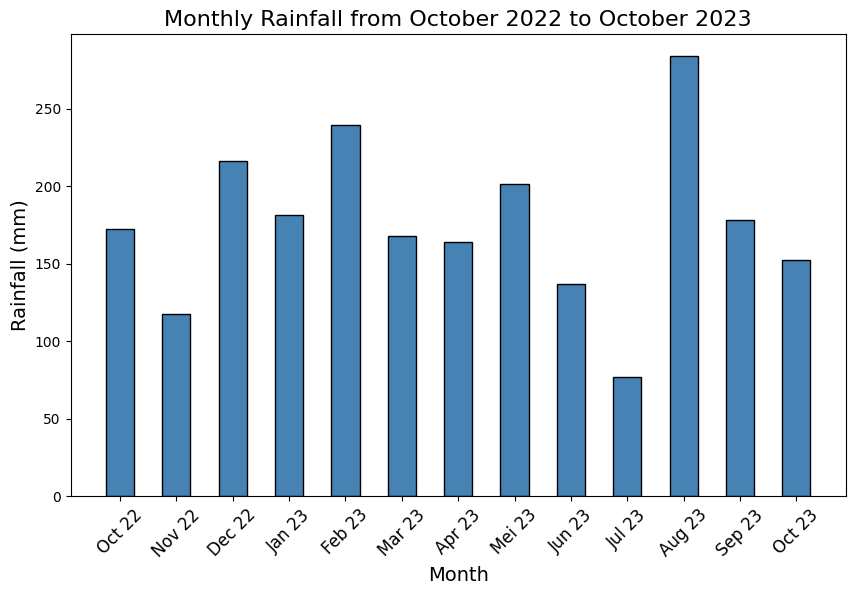

In [14]:
curah_hujan = [172.1, 117.3, 216.1, 181.4, 239.2, 168, 163.7, 201.2, 136.7, 76.8, 283.7, 178.1, 152.3]
bulan = ['Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 'Apr 23', 'Mei 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23', 'Oct 23']

plt.figure(figsize=(10, 6))
plt.bar(bulan, curah_hujan, width=0.5, color='#4682B4', edgecolor='black')
plt.title('Monthly Rainfall from October 2022 to October 2023', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.xticks(ticks=range(13), rotation=45, fontsize=12)
plt.show()

#### Distribusi Hujan Per Bulan

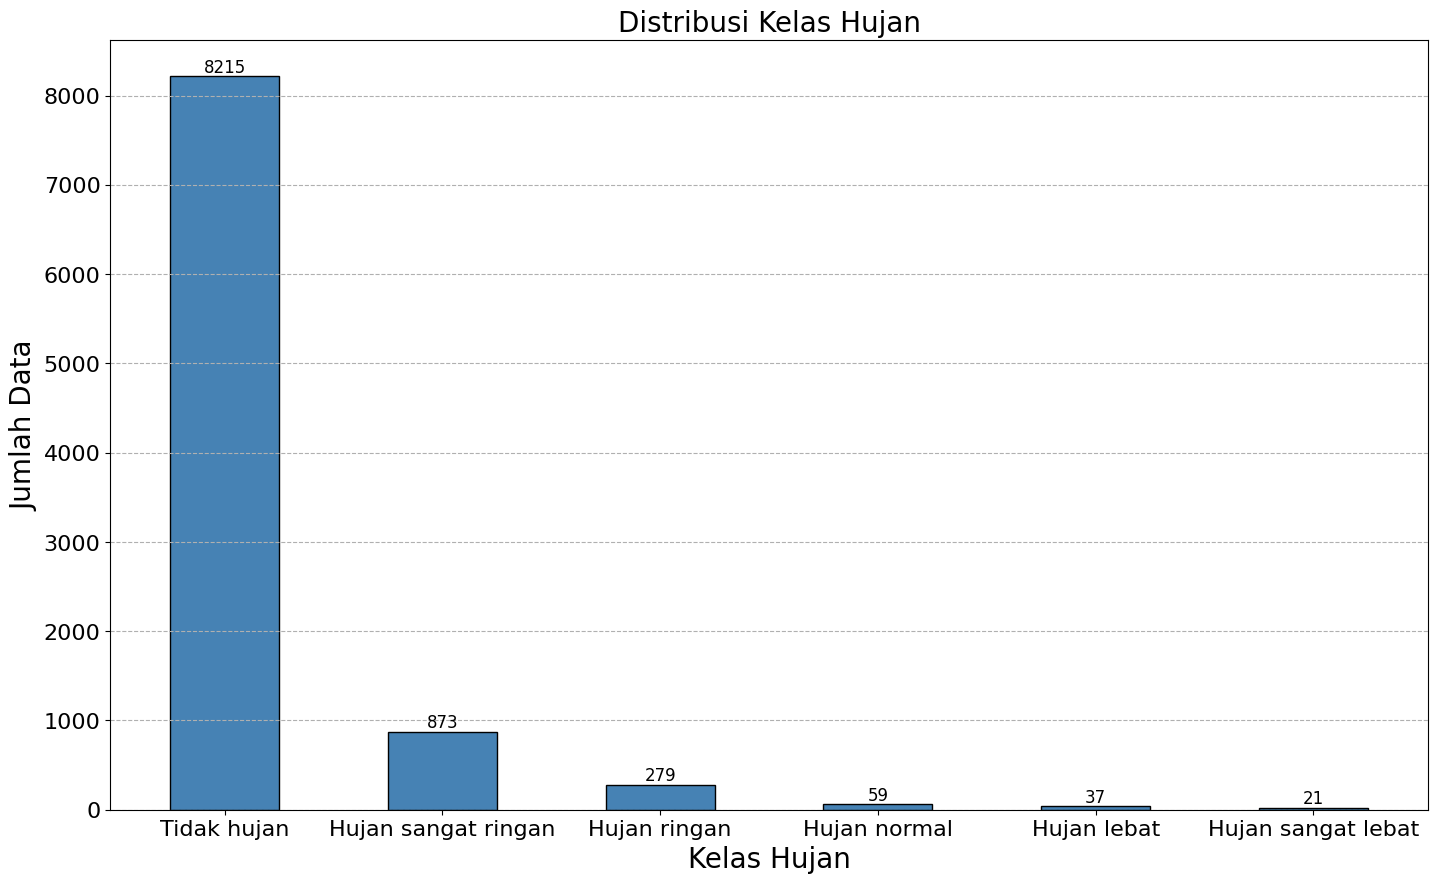

In [15]:
rain_class = data['Rain Class'].value_counts()

plt.figure(figsize=(17, 10))
bars = plt.bar(rain_class.index, rain_class.values, width=0.5, color='#4682B4', edgecolor='black')
for bar, value in zip(bars, rain_class.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Distribusi Kelas Hujan', fontsize=20)
plt.xlabel('Kelas Hujan', fontsize=20)
plt.ylabel('Jumlah Data', fontsize=20)
plt.xticks(fontsize=16, rotation=0)  
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--')
plt.show()

### Numerical_data

In [16]:
numerical_data = data.select_dtypes(include=['int64', 'float64']).columns

#### Histogram

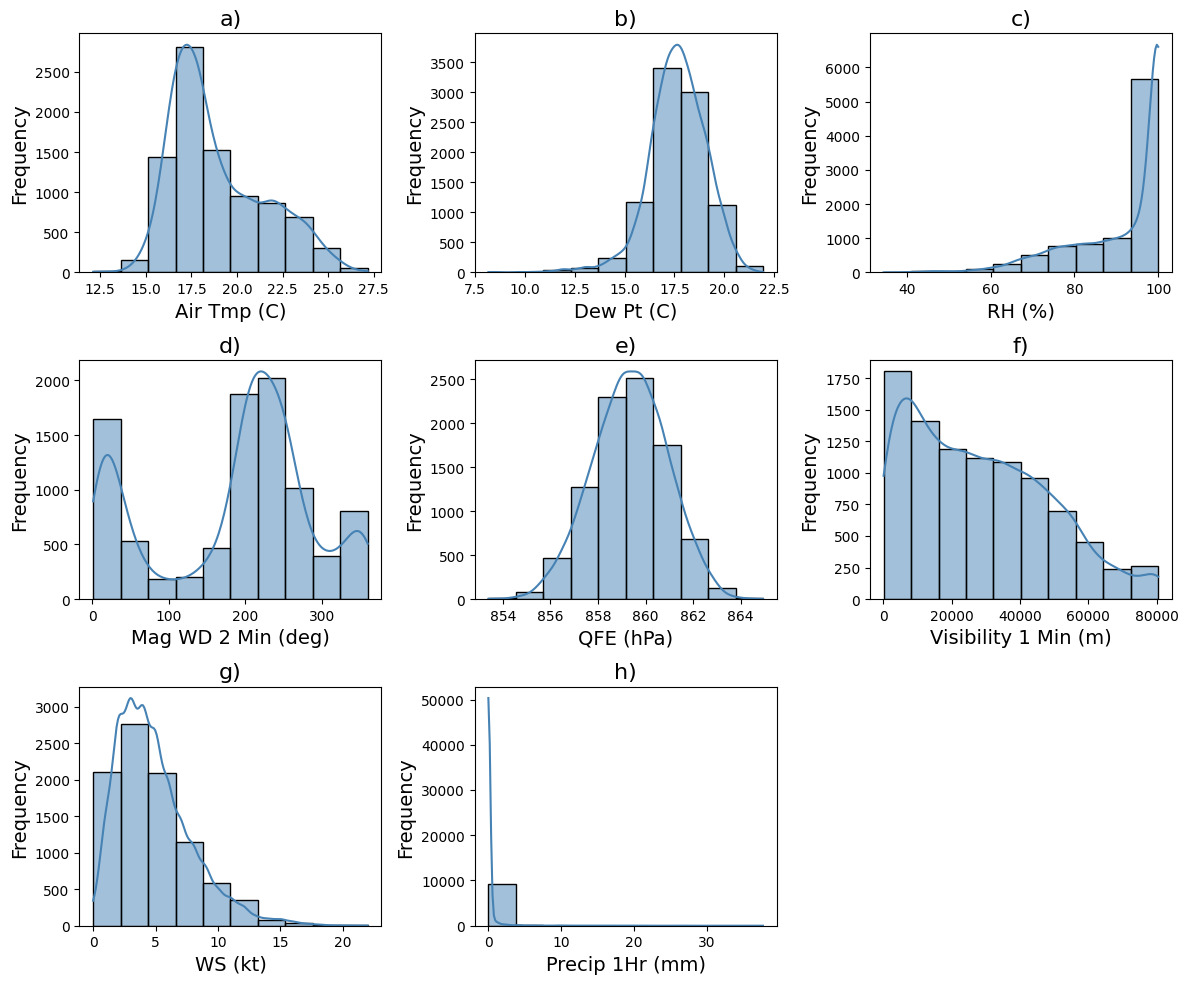

In [17]:
# Membuat subplot dengan 5 baris dan 3 kolom
fig, axes = plt.subplots(5, 3, figsize=(12, 16))

# List huruf untuk judul grafik
titles = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i, column in enumerate(numerical_data):
    row = i // 3  # Baris ke berapa
    col = i % 3   # Kolom ke berapa
    ax = axes[row, col]  # Mengambil sumbu yang sesuai

    # Membuat histogram plot dengan KDE
    sns.histplot(data=data, x=column, kde=True, ax=ax, bins=10, color='#4682B4', edgecolor='black')
    # ax.set_title(f'Histogram of {column}', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    # Menambahkan judul
    ax.set_title(f'{titles[i]})', fontsize=16)

# Menyembunyikan subplot yang tidak terpakai
for i in range(len(numerical_data), 5 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# plt.tight_layout()  # Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5) 

# Menyusun subplot dan menampilkan plot
plt.tight_layout()
plt.show()

#### Box Plot

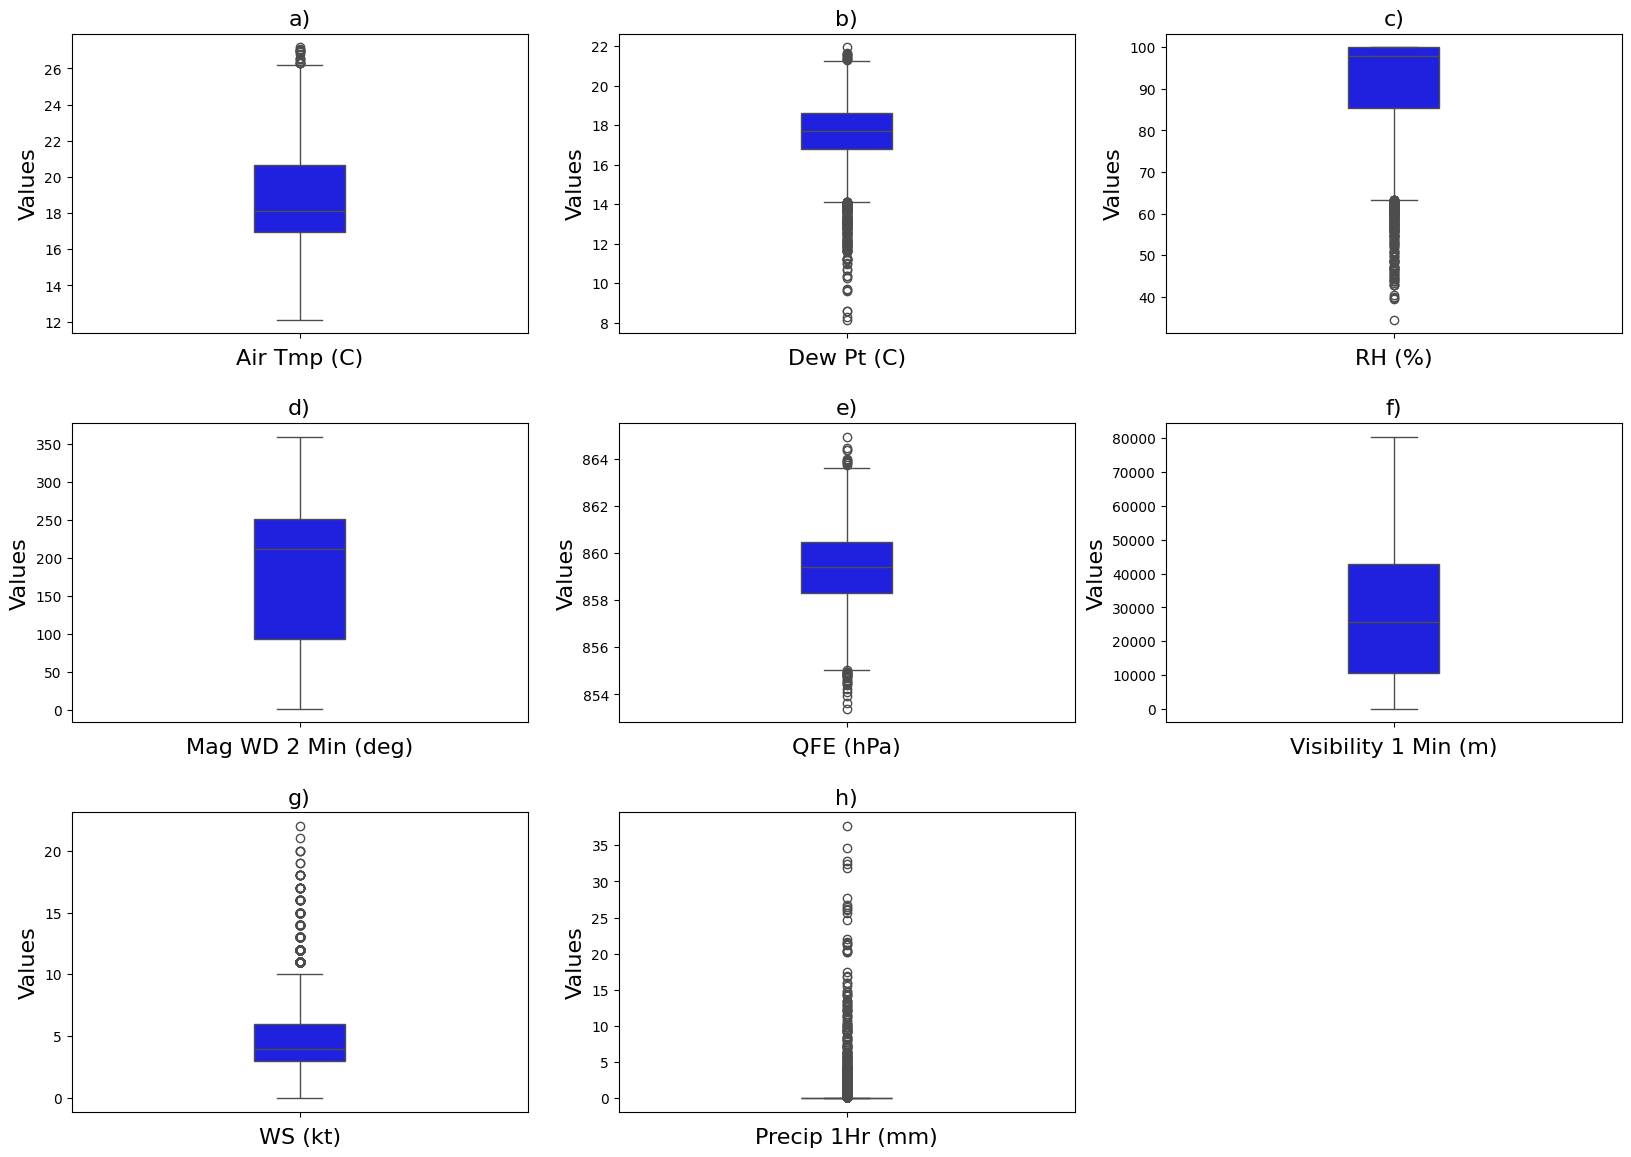

In [18]:
# Menentukan ukuran figure
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 14))
ax = ax.flatten()  # Mengubah array 2D dari axes menjadi 1D untuk memudahkan indexing

# List huruf untuk judul grafik
titles = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# Looping melalui setiap feature dan subplot axes
for i, ft in enumerate(numerical_data):
    sns.boxplot(data=data, y=ft, ax=ax[i], color='blue', width=0.2)
    ax[i].set_title(f'{titles[i]})', fontsize=16)
    ax[i].set_xlabel(ft, fontsize=16)
    ax[i].set_ylabel('Values', fontsize=16)
    

# Menyembunyikan axes yang tidak digunakan jika jumlah features kurang dari jumlah subplot
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.subplots_adjust(hspace=0.3)  # Memberikan jarak vertikal antar subplot
plt.yticks(fontsize=14)
plt.show()

# Data Pre-processing

## Missing value

In [19]:
data.isnull().sum()

Air Tmp (C)             675
Dew Pt (C)              295
RH (%)                  292
Mag WD 2 Min (deg)      330
QFE (hPa)               280
Visibility 1 Min (m)    264
WS (kt)                 293
Precip 1Hr (mm)           0
Rain Class                0
dtype: int64

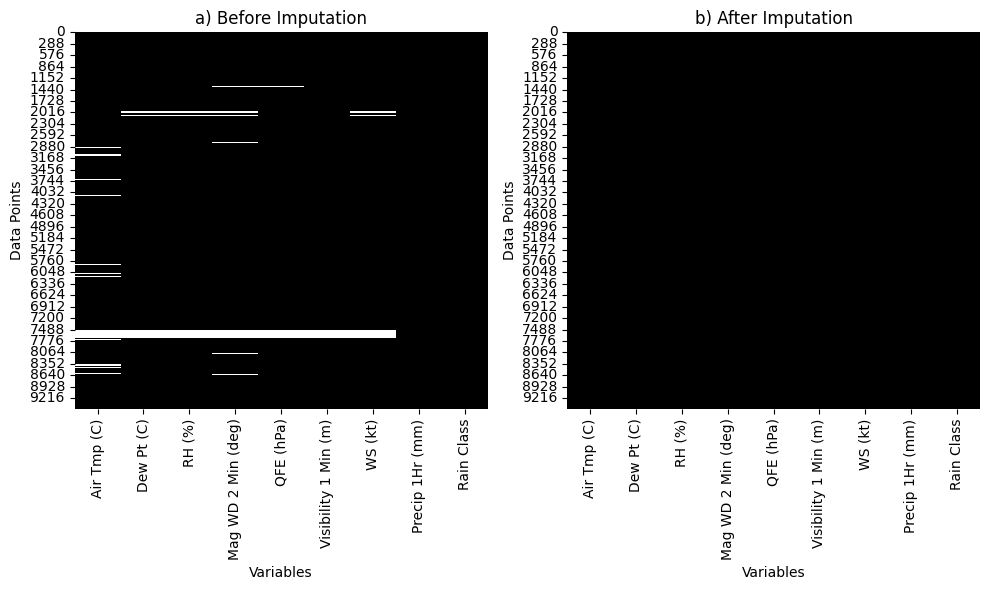

In [20]:
# Memvisualisasikan missing value sebelum imputasi
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(data.isnull(), cbar=False, cmap='bone')
plt.title('a) Before Imputation')
plt.xlabel('Variables')
plt.ylabel('Data Points')

# Melakukan imputasi dengan interpolasi linier
data_imputed = data.interpolate(method='linear')

# Memvisualisasikan missing value setelah imputasi
plt.subplot(1, 2, 2)
sns.heatmap(data_imputed.isnull(), cbar=False, cmap='bone')
plt.title('b) After Imputation')
plt.xlabel('Variables')
plt.ylabel('Data Points')
plt.tight_layout()
plt.show()

data=data_imputed

In [21]:
data.isnull().sum()

Air Tmp (C)             0
Dew Pt (C)              0
RH (%)                  0
Mag WD 2 Min (deg)      0
QFE (hPa)               0
Visibility 1 Min (m)    0
WS (kt)                 0
Precip 1Hr (mm)         0
Rain Class              0
dtype: int64

## Outliers

In [22]:
# def outliers(df, ft):
#     Q1 = df[ft].quantile(0.25)
#     Q3 = df[ft].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
#     return ls

# index_list = []
# for feature in ['Air Tmp (C)', 'Dew Pt (C)', 'RH (%)',
#                 'Mag WD 2 Min (deg)', 'QFE (hPa)', 
#                 'Visibility 1 Min (m)', 'WS (kt)']:
#     index_list.extend(outliers(data, feature))
# print(index_list)

# def remove(df, ls):
#     ls = sorted(set(ls))
#     df = df.drop(ls)
#     return  

# data = remove(data, index_list)

## Encoding

In [23]:
# Membuat dictionary untuk mapping kategori ke nilai numerik
kategori_mapping = {
    "Tidak hujan": 0,
    "Hujan sangat ringan": 1,
    "Hujan ringan": 2,
    "Hujan normal": 3,
    "Hujan lebat": 4,
    "Hujan sangat lebat": 5
}

data['Rain Class'] = data['Rain Class'].map(kategori_mapping)

In [24]:
data

,Air Tmp (C),Dew Pt (C),RH (%),Mag WD 2 Min (deg),QFE (hPa),Visibility 1 Min (m),WS (kt),Precip 1Hr (mm),Rain Class
0,17.22,17.02,100.0,48.0,859.42,18693.0,5.0,0.0,0
1,17.22,17.13,100.0,16.0,859.70,20117.0,3.0,0.0,0
2,19.22,18.19,97.6,22.0,860.12,42484.0,9.0,0.0,0
3,20.78,17.34,85.2,18.0,860.20,47283.0,7.0,0.0,0
4,20.61,16.94,81.4,13.0,859.62,75677.0,8.0,0.0,0
...,...,...,...,...,...,...,...,...,...
9479,16.39,16.62,100.0,329.0,858.67,112.0,1.0,0.0,0
9480,16.56,16.90,100.0,15.0,859.18,1887.0,2.0,0.0,0
9481,19.78,19.17,95.7,35.0,860.01,13293.0,1.0,0.0,0
9482,21.94,20.04,89.3,73.0,860.74,19647.0,5.0,0.0,0


## Feature selection

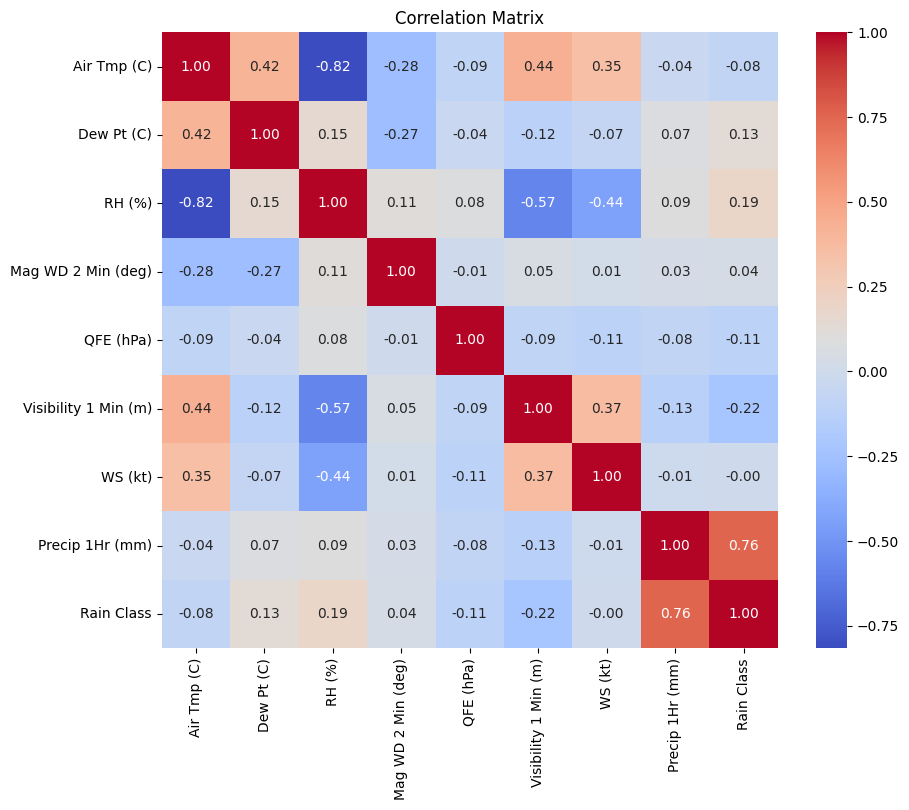

In [25]:
# Menghitung matriks korelasi
corr_matrix = data.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# data = data.drop(['Mag WD 2 Min (deg)', 'Dew Pt (C)', 'Precip 1Hr (mm)'] , axis=1)
# data = data.drop(['Mag WD 2 Min (deg)', 'WS (kt)', 'Precip 1Hr (mm)'] , axis=1)
# data = data.drop(['Mag WD 2 Min (deg)', 'Precip 1Hr (mm)'] , axis=1)
# data = data.drop(['WS (kt)', 'Precip 1Hr (mm)'] , axis=1)
data = data.drop('Precip 1Hr (mm)', axis=1)

## Imbalance data

In [27]:
# Memisahkan fitur dan label
X = data.drop(['Rain Class'], axis=1)
y = data['Rain Class']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

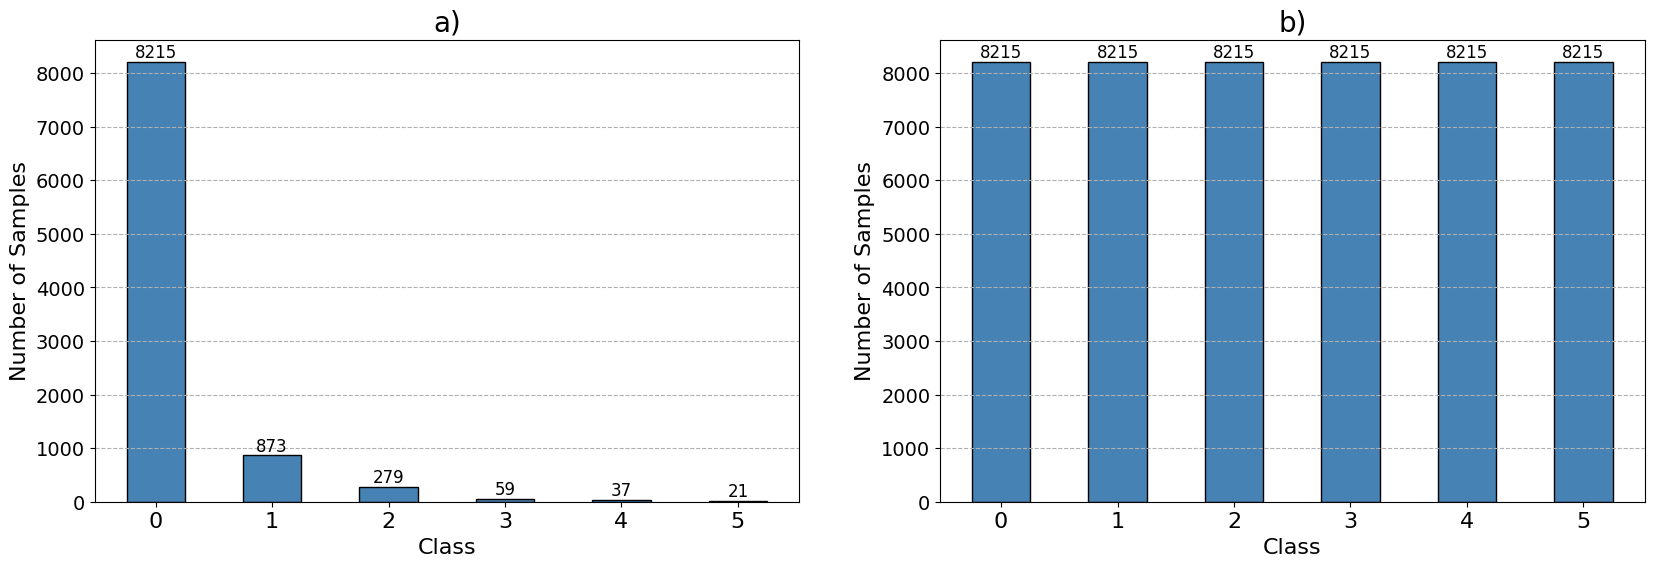

In [28]:
def plot_class_distribution(y, title, ax):
    class_counts = y.value_counts().sort_index()
    
    # Membuat bar plot pada axes yang diberikan
    bars = ax.bar(class_counts.index, class_counts.values, width=0.5, color='#4682B4', edgecolor='black')
    
    # Menambahkan nilai teks di atas setiap bar
    for bar, value in zip(bars, class_counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, value, str(value), 
                ha='center', va='bottom', fontsize=12, color='black')
    
    ax.set_xlabel('Class', fontsize=16)
    ax.set_ylabel('Number of Samples', fontsize=16)
    ax.set_title(title, fontsize=20)
    ax.set_xticks(class_counts.index)
    ax.set_xticklabels(class_counts.index, fontsize=16, rotation=0)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(axis='y', linestyle='--')

# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Visualisasi distribusi kelas sebelum SMOTE
plot_class_distribution(y, 'a)', axes[0])

# Visualisasi distribusi kelas setelah SMOTE
plot_class_distribution(y_sm, 'b)', axes[1])

plt.subplots_adjust(wspace=0.2)
plt.show()


C:\Users\Roviani Amelia\AppData\Local\Temp\ipykernel_16692\1130939745.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(np.unique(y)))


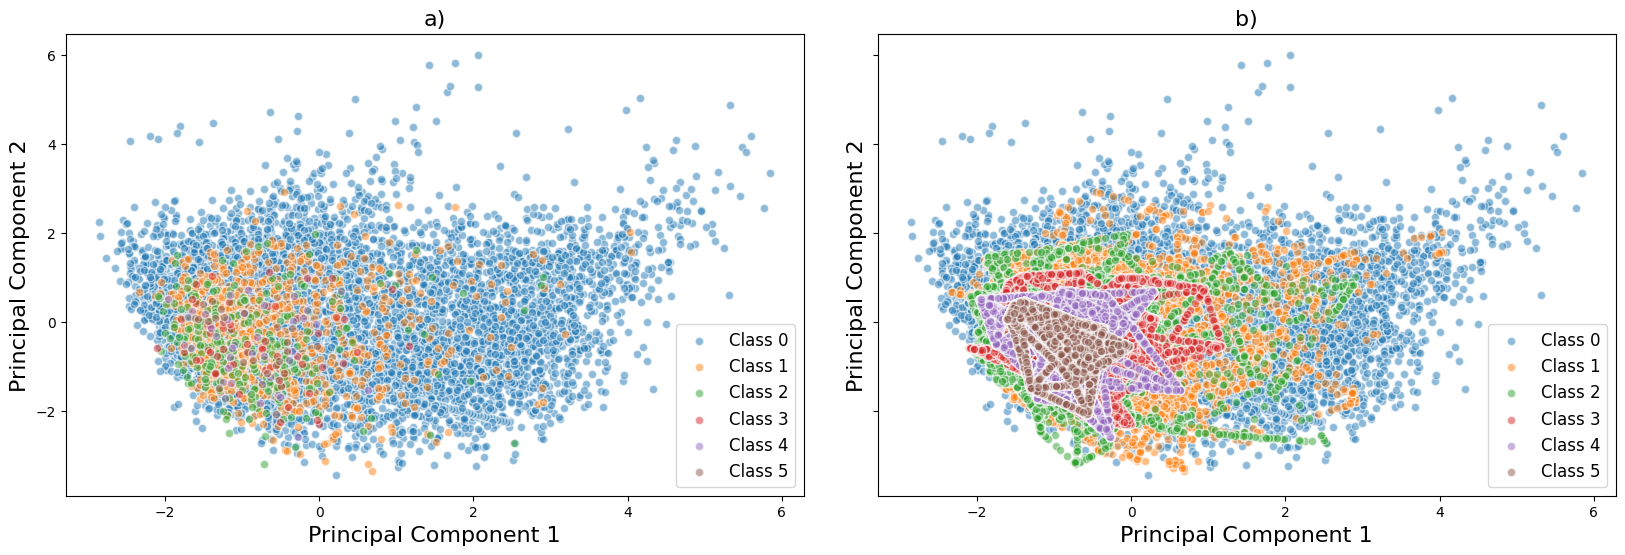

In [29]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA dengan pengaturan random_state untuk konsistensi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# SMOTE dengan pengaturan random_state untuk konsistensi
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_resampled_pca = pca.transform(X_resampled)

# Visualisasi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True, sharey=True)
colors = plt.cm.get_cmap('tab10', len(np.unique(y)))

# Plot untuk data sebelum SMOTE
for class_value in np.unique(y):
    mask = y == class_value
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], alpha=0.5, label=f"Class {class_value}", 
                    edgecolors='w')
axes[0].set_title('a)', fontsize=16)
axes[0].set_xlabel('Principal Component 1', fontsize=16)
axes[0].set_ylabel('Principal Component 2', fontsize=16)
axes[0].legend(fontsize=12)

# Plot untuk data setelah SMOTE
for class_value in np.unique(y_resampled):
    mask = y_resampled == class_value
    axes[1].scatter(X_resampled_pca[mask, 0], X_resampled_pca[mask, 1], alpha=0.5, label=f"Class {class_value}", 
                    edgecolors='w')
axes[1].set_title('b)', fontsize=16)
axes[1].set_xlabel('Principal Component 1', fontsize=16)
axes[1].set_ylabel('Principal Component 2', fontsize=16)
axes[1].legend(fontsize=12)

plt.subplots_adjust(wspace=0.1)
plt.show()


## Save cleaned data

In [30]:
# # Save the DataFrame to an Excel file
# data.to_excel('cleaned_data.xlsx', index=False, engine='openpyxl')

# Data Preprocessing Data Tes

In [31]:
# tes = pd.read_excel('Jan 2024 to Mar 2024.xlsx')

In [32]:
# def interpolate(df):
#     numeric_columns = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
#     for column in numeric_columns:
#         df[column] = df[column].interpolate(method='linear')
#     return df

# tes = interpolate(tes)

In [33]:
# # Membuat dictionary untuk mapping kategori ke nilai numerik
# kategori_mapping = {
#     "Tidak hujan": 0,
#     "Hujan sangat ringan": 1,
#     "Hujan ringan": 2,
#     "Hujan normal": 3,
#     "Hujan lebat": 4,
#     "Hujan sangat lebat": 5
# }

# tes['Rain Class'] = tes['Rain Class'].map(kategori_mapping)

In [34]:
# # Save the DataFrame to an Excel file
# data.to_excel('cleaned_data.xlsx', index=False, engine='openpyxl')
# tes.to_excel('cleaned_tes.xlsx', index=False, engine='openpyxl')

In [35]:
# # Memisahkan fitur dan label
# X_tes = tes.drop(['Rain Class', 'Precip 1Hr (mm)'], axis=1)
# y_tes = tes['Rain Class']

# # Menerapkan SMOTE
# smote = SMOTE(random_state=42, k_neighbors=min(2, len(y_tes.unique()) - 1))
# X_tes, y_tes = smote.fit_resample(X_tes, y_tes)

# Modeling

## Split Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [37]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## XGBoost Model

In [38]:
# Mendefinisikan hyperparameter model
hyperparameters = {
    'max_depth': 6,
    'min_child_weight': 1,
    'learning_rate': 0.3,
    'n_estimators': 100,
    'subsample': 1,
    'colsample_bytree': 1,
}

# Mendefinisikan model XGBoost dengan hyperparameter
model = xgb.XGBClassifier(**hyperparameters, use_label_encoder=False)

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data pengujian: ", accuracy)

Akurasi pada data pengujian:  0.9367011564211808


## Feature Importance

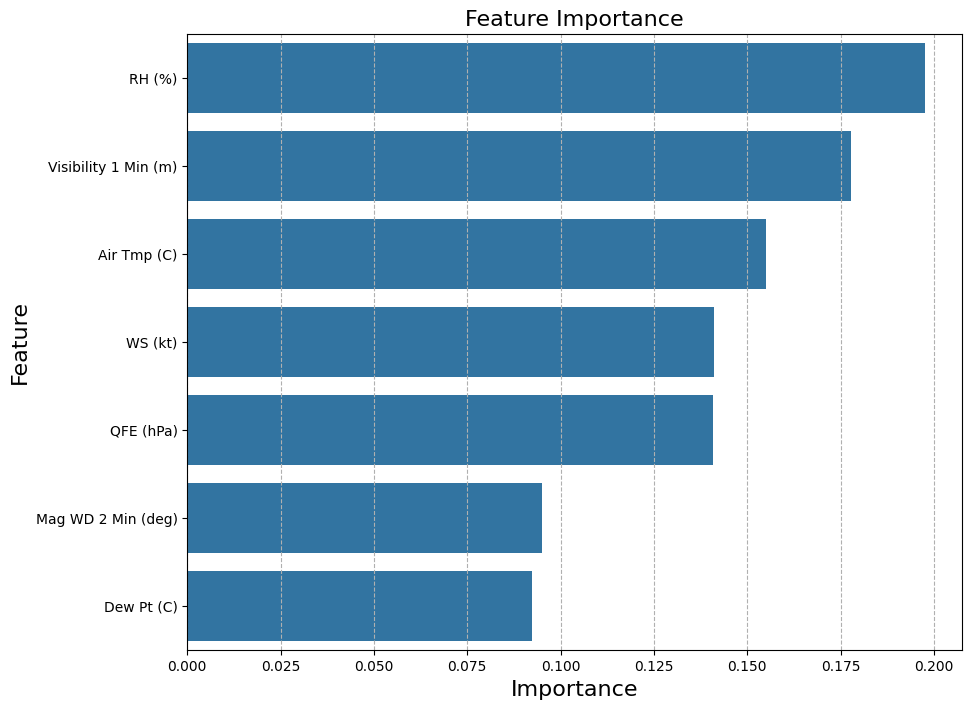

In [39]:
# Mendapatkan feature importance
feature_importance = model.feature_importances_

# Mendapatkan nama fitur, asumsikan X_train adalah pandas DataFrame
feature_names = X_train.columns

# Membuat DataFrame dari feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.grid(axis='x', linestyle='--')
plt.show()

## Permutation Importance

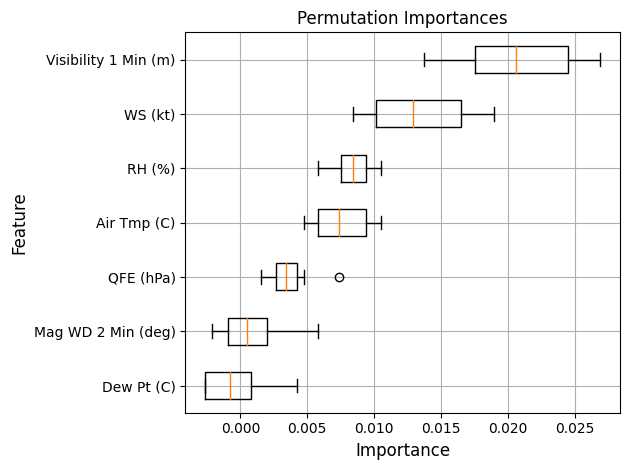

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

from sklearn.inspection import permutation_importance

feature_names = X.columns.tolist()  # Misalkan X adalah DataFrame pandas

# Menghitung permutation importance
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Hasil importance
importance = results.importances_mean

# Nama fitur dari dataset Anda
feature_names = X.columns.tolist()  # Misalkan X adalah DataFrame pandas

# Visualisasi
fig, ax = plt.subplots()
sorted_idx = np.argsort(importance)
ax.boxplot(results.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
ax.set_title("Permutation Importances")
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
fig.tight_layout()
plt.grid()
plt.show()

## Fix Model

In [41]:
data = data.drop(['Dew Pt (C)', 'Mag WD 2 Min (deg)'] , axis=1)

# Memisahkan fitur dan label
X = data.drop(['Rain Class'], axis=1)
y = data['Rain Class']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [42]:
# Mendefinisikan hyperparameter model
hyperparameters = {
    'max_depth': 6,
    'min_child_weight': 1,
    'learning_rate': 0.3,
    'n_estimators': 100,
    'subsample': 1,
    'colsample_bytree': 1,
}

# Mendefinisikan model XGBoost dengan hyperparameter
model = xgb.XGBClassifier(**hyperparameters, use_label_encoder=False)

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data pengujian: ", accuracy)

Akurasi pada data pengujian:  0.9153986609860012


## Classification report

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train, y_train, cv=kfold)

# Laporan Klasifikasi
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1687
           1       0.88      0.76      0.81      1602
           2       0.91      0.87      0.89      1614
           3       0.93      0.96      0.94      1704
           4       0.92      0.98      0.95      1608
           5       0.97      0.99      0.98      1643

    accuracy                           0.92      9858
   macro avg       0.91      0.91      0.91      9858
weighted avg       0.91      0.92      0.91      9858



## Confusion Matrix

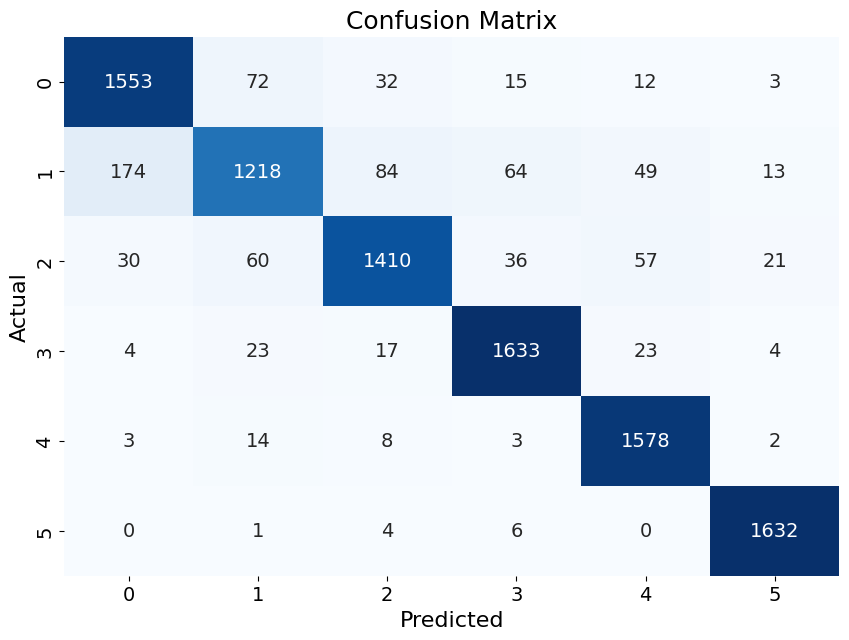

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 14},
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.show()

## Loss Curve

[0]	validation_0-mlogloss:1.54496	validation_1-mlogloss:1.54602
[1]	validation_0-mlogloss:1.39485	validation_1-mlogloss:1.39847
[2]	validation_0-mlogloss:1.29149	validation_1-mlogloss:1.29703
[3]	validation_0-mlogloss:1.20780	validation_1-mlogloss:1.21396


c:\Users\Roviani Amelia\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-mlogloss:1.14499	validation_1-mlogloss:1.15235
[5]	validation_0-mlogloss:1.08813	validation_1-mlogloss:1.09609
[6]	validation_0-mlogloss:1.04154	validation_1-mlogloss:1.05047
[7]	validation_0-mlogloss:0.99282	validation_1-mlogloss:1.00311
[8]	validation_0-mlogloss:0.95487	validation_1-mlogloss:0.96784
[9]	validation_0-mlogloss:0.91402	validation_1-mlogloss:0.92660
[10]	validation_0-mlogloss:0.87190	validation_1-mlogloss:0.88597
[11]	validation_0-mlogloss:0.83870	validation_1-mlogloss:0.85409
[12]	validation_0-mlogloss:0.80241	validation_1-mlogloss:0.81760
[13]	validation_0-mlogloss:0.78330	validation_1-mlogloss:0.79915
[14]	validation_0-mlogloss:0.76002	validation_1-mlogloss:0.77596
[15]	validation_0-mlogloss:0.73858	validation_1-mlogloss:0.75583
[16]	validation_0-mlogloss:0.72104	validation_1-mlogloss:0.73981
[17]	validation_0-mlogloss:0.70331	validation_1-mlogloss:0.72317
[18]	validation_0-mlogloss:0.69036	validation_1-mlogloss:0.71122
[19]	validation_0-mlogloss:0.67

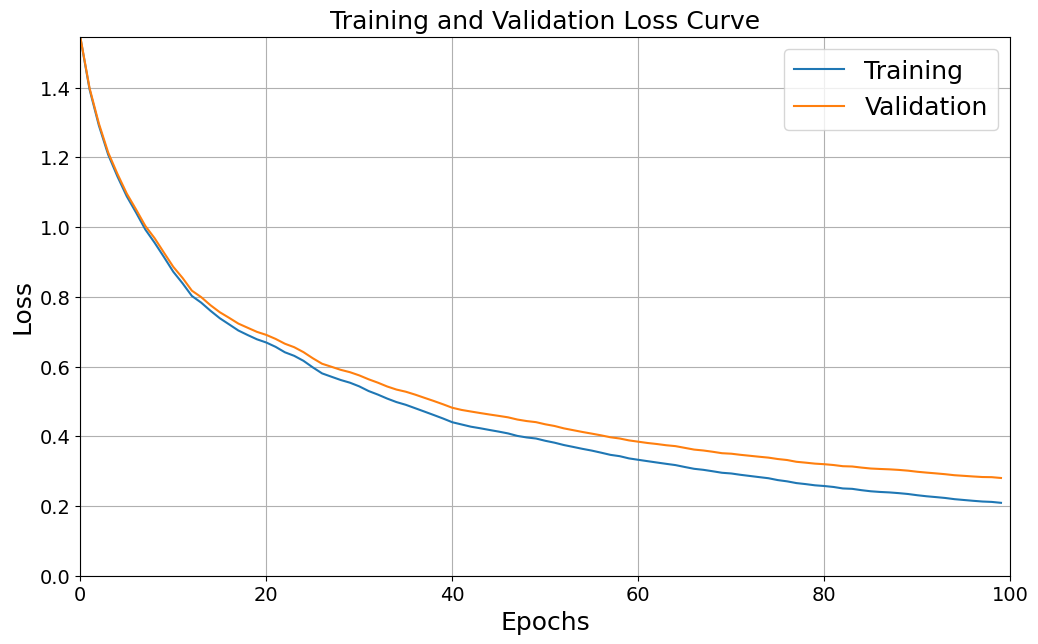

Akurasi pada data pengujian:  0.91661594643944


In [45]:
# Membagi dataset menjadi training set, validation set, dan testing set
X_train, X_temp, y_train, y_temp = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mendefinisikan hyperparameter model
hyperparameters = {
    'max_depth': 6,
    'min_child_weight': 1,
    'learning_rate': 0.3,
    'n_estimators': 100,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'multi:softprob', 
    'num_class': 6,  
    'eval_metric': 'mlogloss',
    'use_label_encoder': False
}

# Mendefinisikan model XGBoost dengan hyperparameter
model = xgb.XGBClassifier(**hyperparameters)

# Melatih model dengan data training dan validasi
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

# Mengakses hasil evaluasi
results = model.evals_result()

# Membuat grafik dari loss training dan validasi
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Training')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend(fontsize=18) 
ax.set_xlabel('Epochs', fontsize=18) 
ax.set_ylabel('Loss', fontsize=18) 
plt.title('Training and Validation Loss Curve', fontsize=18) 
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14)
plt.grid()

# Menetapkan batas sumbu y dari 0 sampai nilai maksimum loss di kedua kurva
max_loss = max(max(results['validation_0']['mlogloss']), max(results['validation_1']['mlogloss']))
ax.set_ylim([0, max_loss])
ax.set_xlim([0, epochs])
plt.show()

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data pengujian: ", accuracy)

## ROC-AUC

In [46]:
# # Binarize labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# # Menghitung nilai probabilitas prediksi dari model untuk setiap kelas
# y_pred_prob = model.predict_proba(X_test)

# # Menghitung kurva ROC dan AUC untuk setiap kelas
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot kurva ROC untuk setiap kelas
# plt.figure(figsize=(10, 7))
# for i in range(len(np.unique(y_test))):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (AUC = {:0.2f})'.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) for Multiclass', fontsize=18)
# plt.legend(loc="lower right", fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.grid(True)
# plt.show()


## Save prediction

In [47]:
# df_results = pd.DataFrame({
#     'Data Aktual': y_test,
#     'Data Prediksi': y_pred
# })

# # Menyimpan DataFrame ke dalam file Excel
# df_results.to_excel('hasil_prediksi.xlsx', index=False, engine='openpyxl')

# print("Data telah berhasil disimpan dalam format Excel.")

## Data test baru

In [48]:
# # Langkah 3: Melakukan prediksi menggunakan model yang telah dilatih
# y_pred_new = model.predict(X_tes)

# # Langkah 4: Evaluasi model menggunakan data testing baru
# # Menghitung akurasi
# accuracy_new = accuracy_score(y_tes, y_pred_new)
# print("Akurasi pada data testing baru: ", accuracy_new)

# # Menampilkan confusion matrix
# conf_matrix_new = confusion_matrix(y_tes, y_pred_new)
# print("Confusion Matrix pada data testing baru:")
# print(conf_matrix_new)

# # Menampilkan laporan klasifikasi
# print("Laporan Klasifikasi pada data testing baru:")
# print(classification_report(y_tes, y_pred_new))

# Tuning Hyperparameter

## Random Search

In [49]:
# Parameter untuk Random Search
params = {
    'max_depth': list(range(0, 21)),  # Mulai dari 0, berakhir di 20
    'min_child_weight': list(range(0, 21)),  # Mulai dari 0, berakhir di 20
    'learning_rate': [i * 0.1 + 0.1 for i in range(0, 10)],  # Mulai dari 0.1, berakhir di 1.0
    'n_estimators': list(range(100, 511, 10)),  # Mulai dari 100, berakhir di 500
    'subsample': [i * 0.01 + 0.8 for i in range(21)],  # Mulai dari 0.8, berakhir di 1.0
    'colsample_bytree': [i * 0.01 + 0.5 for i in range(21)]  # Mulai dari 0.5, berakhir di 0.7
}

# Membuat model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, 
                              eval_metric='logloss')

# Menerapkan RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, 
                                   param_distributions=params, 
                                   n_iter=25, 
                                   scoring='accuracy', 
                                   cv=5)

# Melatih model dengan Random Search
random_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters:", random_search.best_params_)

# Memprediksi pada data test
predictions = random_search.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Laporan Klasifikasi
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Best parameters: {'subsample': 0.91, 'n_estimators': 230, 'min_child_weight': 1, 'max_depth': 18, 'learning_rate': 0.30000000000000004, 'colsample_bytree': 0.67}
Accuracy: 0.9470480827754109
Confusion Matrix:
[[770  54  13   4   2   1]
 [ 60 688  39  14   4   1]
 [ 15  19 760   8   3   1]
 [  3   4   4 849   2   0]
 [  2   4   1   0 792   1]
 [  0   0   1   1   0 809]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       844
           1       0.89      0.85      0.87       806
           2       0.93      0.94      0.94       806
           3       0.97      0.98      0.98       862
           4       0.99      0.99      0.99       800
           5       1.00      1.00      1.00       811

    accuracy                           0.95      4929
   macro avg       0.95      0.95      0.95      4929
weighted avg       0.95      0.95      0.95      4929



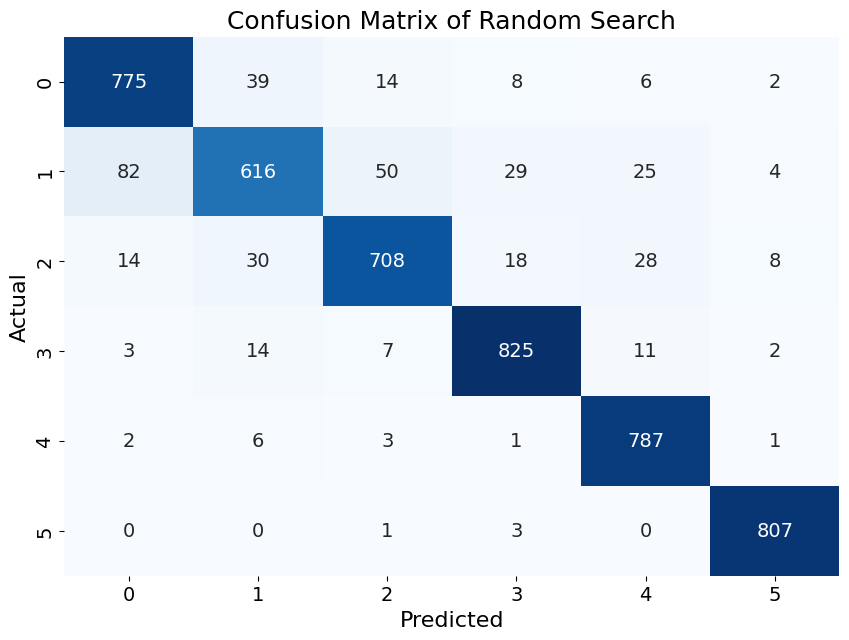

In [50]:
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 14},
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of Random Search', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.show()

## Bayesian Optimization

In [51]:
!pip install scikit-optimize


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
# Mendefinisikan model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, 
                              eval_metric='logloss')

# Mendefinisikan ruang pencarian hyperparameter
search_space = {
    'max_depth': list(range(0, 21)),  # Mulai dari 0, berakhir di 20
    'min_child_weight': list(range(0, 21)),  # Mulai dari 0, berakhir di 20
    'learning_rate': [i * 0.1 + 0.1 for i in range(0, 10)],  # Mulai dari 0.1, berakhir di 1.0
    'n_estimators': list(range(100, 511, 10)),  # Mulai dari 100, berakhir di 500
    'subsample': [i * 0.01 + 0.8 for i in range(21)],  # Mulai dari 0.8, berakhir di 1.0
    'colsample_bytree': [i * 0.01 + 0.5 for i in range(21)]  # Mulai dari 0.5, berakhir di 0.7
}

bayes_search = BayesSearchCV(
    xgb_model, 
    search_space, 
    n_iter=25, 
    scoring='accuracy',
    cv=5)

# Melatih model dengan Bayesian Optimization
bayes_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best hyperparameters found: ", bayes_search.best_params_)

# Memprediksi pada set pengujian
predictions = bayes_search.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set: ", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Laporan Klasifikasi
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Best hyperparameters found:  OrderedDict([('colsample_bytree', 0.64), ('learning_rate', 0.30000000000000004), ('max_depth', 14), ('min_child_weight', 2), ('n_estimators', 250), ('subsample', 0.8700000000000001)])
Accuracy on test set:  0.9450192736863461
Confusion Matrix:
[[768  57  13   3   1   2]
 [ 67 676  39  16   5   3]
 [ 13  18 762   7   5   1]
 [  3   3   3 851   2   0]
 [  2   3   1   1 792   1]
 [  0   0   1   1   0 809]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       844
           1       0.89      0.84      0.87       806
           2       0.93      0.95      0.94       806
           3       0.97      0.99      0.98       862
           4       0.98      0.99      0.99       800
           5       0.99      1.00      0.99       811

    accuracy                           0.95      4929
   macro avg       0.94      0.94      0.94      4929
weighted avg       0.94      0.95      0.94      4929

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5')])

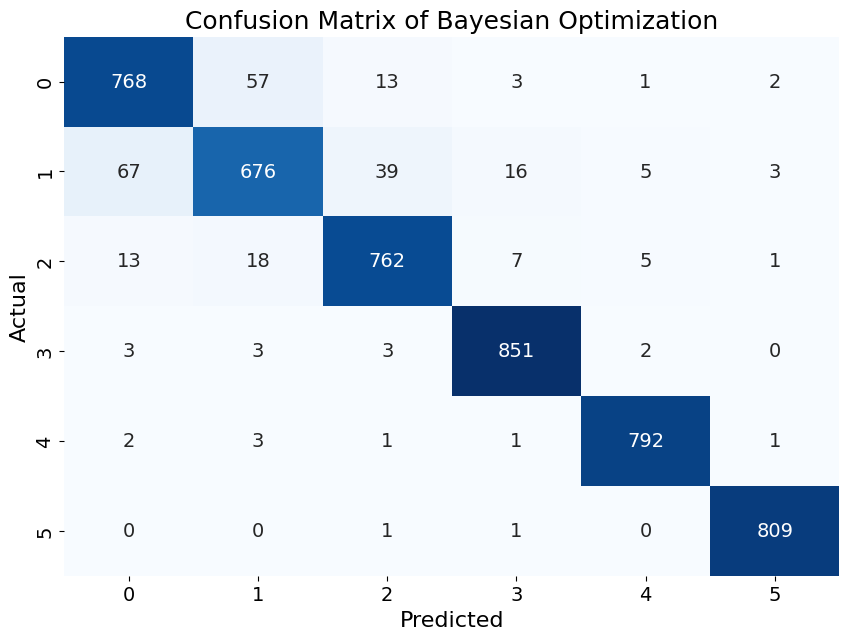

In [53]:
cm = confusion_matrix(y_test, predictions)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 14},
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of Bayesian Optimization', fontsize=18)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 

## Grid Search

In [54]:
# # Parameter untuk Random Search
# params = {
#     'max_depth': list(range(0, 21)),  # Mulai dari 0, berakhir di 20
#     'min_child_weight': list(range(0, 21)),  # Mulai dari 0, berakhir di 20
#     'learning_rate': [i * 0.1 for i in range(1, 11)],  # Mulai dari 0.1, berakhir di 1.0
#     'n_estimators': list(range(100, 511, 10)),  # Mulai dari 100, berakhir di 500
#     'subsample': [i * 0.01 + 0.8 for i in range(21)],  # Mulai dari 0.8, berakhir di 1.0
#     'colsample_bytree': [i * 0.01 + 0.5 for i in range(21)]  # Mulai dari 0.5, berakhir di 0.7
# }

# # Membuat model XGBoost
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, 
#                               eval_metric='logloss')

# # Menerapkan RandomizedSearchCV
# grid_search = GridSearchCV(estimator=xgb_model,
#                              param_grid=params, 
#                              scoring='accuracy',
#                              cv=5)

# # Melatih model dengan Random Search
# grid_search.fit(X_train, y_train)

# # Menampilkan parameter terbaik
# print("Best parameters:", grid_search.best_params_)

# # Memprediksi pada data test
# predictions = grid_search.predict(X_test)

# # Menghitung akurasi
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Laporan Klasifikasi
# class_report = classification_report(y_test, predictions)
# print("Classification Report:")
# print(class_report)

In [55]:
# cm = confusion_matrix(y_test, y_pred)

# # Membuat heatmap dari confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title('Confusion Matrix Grid Search')
# plt.xlabel('Prediksi')
# plt.ylabel('Aktual')
# plt.show()

## BO-TPE (Hyperopt)

In [56]:
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# from hyperopt.pyll.base import scope

In [57]:
# # Mendefinisikan ruang pencarian hyperparameter
# space = {
#     'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
#     'min_child_weight': scope.int(hp.quniform('min_child_weight', 1, 20, 1)),
#     'learning_rate': hp.loguniform('learning_rate', 0.1, 1),
#     'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 10)),
#     'subsample': hp.uniform('subsample', 0.8, 1),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.7)
# }

# # Fungsi untuk mengoptimalkan
# def objective(space):
#     model = xgb.XGBClassifier(
#         max_depth=int(space['max_depth']),
#         min_child_weight=space['min_child_weight'],
#         learning_rate=space['learning_rate'],
#         n_estimators=int(space['n_estimators']),
#         subsample=space['subsample'],
#         colsample_bytree=space['colsample_bytree'],
#         use_label_encoder=False,
#         eval_metric='logloss'
#     )

#     skf = StratifiedKFold(n_splits=5)
#     accuracy = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean()

#     return {'loss': -accuracy, 'status': STATUS_OK}

# # Menjalankan Hyperband untuk optimasi
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=100,
#             trials=trials)

In [58]:
# from hyperopt import space_eval

In [59]:
# # Mendapatkan hyperparameter terbaik
# best_params = space_eval(space, best)
# print("Best hyperparameters:", best_params)

In [60]:
# # Membuat model dengan hyperparameter terbaik
# best_model = xgb.XGBClassifier(
#     max_depth=int(best_params['max_depth']),
#     min_child_weight=best_params['min_child_weight'],
#     learning_rate=best_params['learning_rate'],
#     n_estimators=int(best_params['n_estimators']),
#     subsample=best_params['subsample'],
#     colsample_bytree=best_params['colsample_bytree'],
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# # Melatih model pada data latih
# best_model.fit(X_train, y_train)

# # Membuat prediksi pada data uji
# y_pred = best_model.predict(X_test)

# # Menghasilkan laporan klasifikasi
# report = classification_report(y_test, y_pred)
# print(report)

In [61]:
# tpe_search = pd.DataFrame([{
#     'max_depth': int(x['misc']['vals']['max_depth'][0]),
#     'min_child_weight': int(x['misc']['vals']['min_child_weight'][0]),
#     'learning_rate': x['misc']['vals']['learning_rate'][0],
#     'n_estimators': int(x['misc']['vals']['n_estimators'][0]),
#     'subsample': x['misc']['vals']['subsample'][0],
#     'colsample_bytree': x['misc']['vals']['colsample_bytree'][0],
#     'accuracy': -x['result']['loss'],
#     'status': x['result']['status']
# } for x in trials.trials if x['result']['status'] == 'ok'])

## Visualisasi Pencarian Hyperparameter

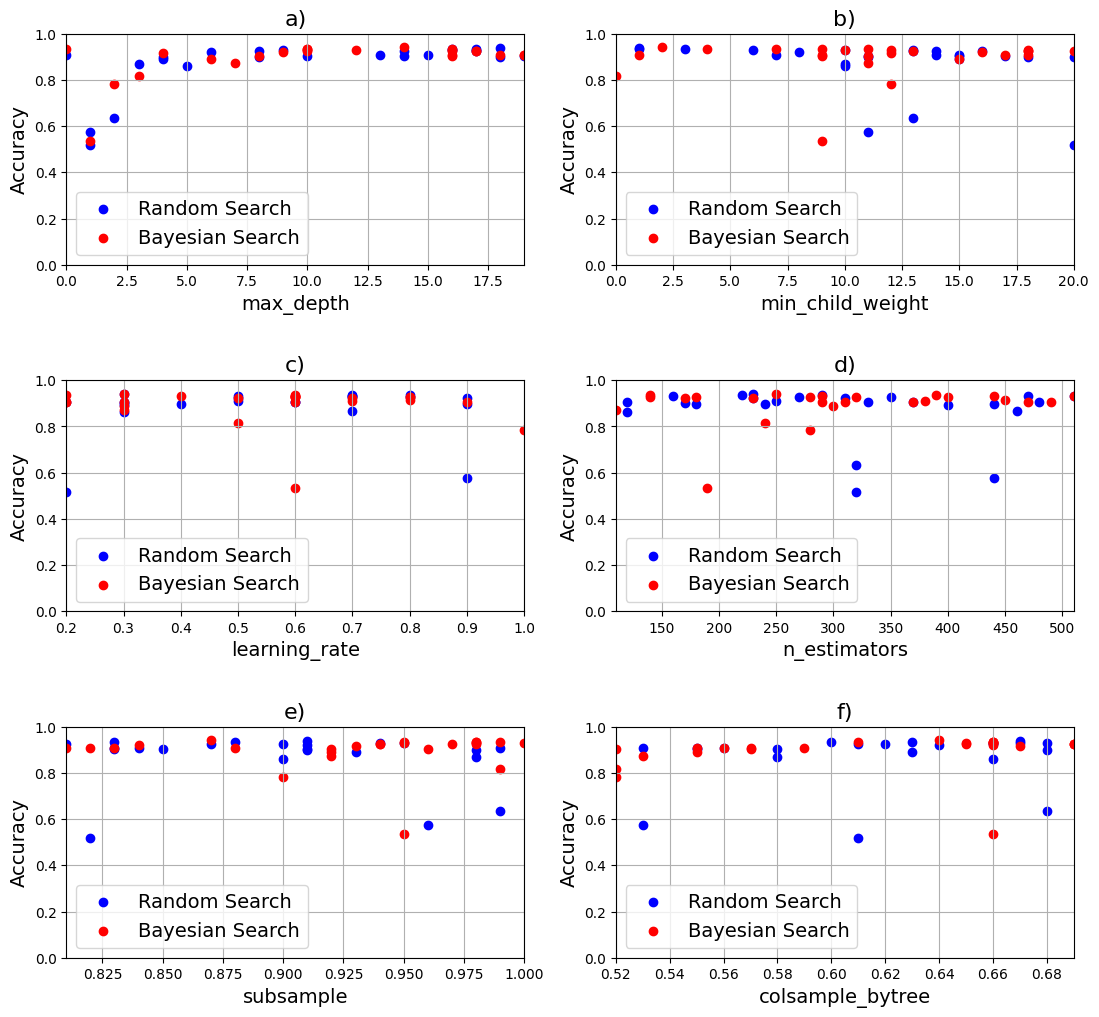

In [62]:
# Dapatkan data dari cv_results_ untuk masing-masing metode pencarian
params = ['max_depth', 'min_child_weight', 'learning_rate', 'n_estimators', 'subsample', 'colsample_bytree']
random_results = random_search.cv_results_
bayes_results = bayes_search.cv_results_

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 12))  # Sesuaikan ukuran dan layout subplot
axes = axes.flatten()  # Flatten array of axes untuk iterasi yang mudah

# Mendefinisikan warna untuk setiap metode pencarian
colors = {'Random Search': 'blue', 'Bayesian Search': 'red'}

# List huruf untuk judul grafik
titles = ['a', 'b', 'c', 'd', 'e', 'f']

for i, param in enumerate(params):

    # Random Search
    random_param_values = random_results[f'param_{param}']
    random_scores = random_results['mean_test_score']
    axes[i].scatter(random_param_values, random_scores, color=colors['Random Search'], label='Random Search')

    # Bayesian Search
    bayes_param_values = bayes_results[f'param_{param}']
    bayes_scores = bayes_results['mean_test_score']
    axes[i].scatter(bayes_param_values, bayes_scores, color=colors['Bayesian Search'], label='Bayesian Search')

    # Setting title, labels, and legend
    axes[i].set_xlabel(param, fontsize=14)
    axes[i].set_ylabel('Accuracy', fontsize=14)
    axes[i].legend(fontsize=14)

    # Set batas atas dan bawah pada sumbu x
    axes[i].set_xlim(min(bayes_param_values), max(bayes_param_values))
    # Set batas atas dan bawah pada sumbu y
    axes[i].set_ylim(0, 1)

    # Menambahkan judul
    axes[i].set_title(f'{titles[i]})', fontsize=16)
    
    # Menambahkan grid
    axes[i].grid(True)
    
# plt.tight_layout()  # Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5)  

plt.show()


In [63]:
# # Anggap 'X' adalah data fitur dan 'y' adalah label target yang sudah di-binarize
# # Misalkan Anda memiliki empat model yang berbeda setelah tuning
# model1 = grid_search
# model2 = random_search
# model3 = bayes_search

# # List untuk menyimpan model
# models = [model1, model2, model3]

# # Warna untuk masing-masing ROC curve
# colors = ['blue', 'green', 'red']
# labels = ['Metode 1', 'Metode 2', 'Metode 3']

# # Binarize y jika belum
# y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])  # Sesuaikan dengan jumlah kelas
# n_classes = y_bin.shape[1]

# # Plot ROC curve untuk masing-masing model
# plt.figure(figsize=(10, 8))

# for model, color, label in zip(models, colors, labels):
#     # Menggunakan OneVsRestClassifier untuk evaluasi multi-class
#     classifier = OneVsRestClassifier(model)
#     classifier.fit(X_train, y_train)
#     y_score = classifier.predict_proba(X_test)

#     # Hitung ROC AUC untuk setiap kelas dan rata-rata mereka
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # Rata-rata ROC AUC
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

#     mean_tpr /= n_classes
#     mean_auc = auc(all_fpr, mean_tpr)
#     plt.plot(all_fpr, mean_tpr, color=color, label=f'{label} (AUC = {mean_auc:.2f})')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()